**Instructions:**
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this exercise is to use EDA, visualization, data cleaning, preprocesing, and linear models to predict the features of a home that add or detract price value of a home.  

From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.



In [1]:
%run lib/__init__.py
%matplotlib inline

np.random.seed(42)

from IPython.display import display


Pandas Initiated
Numpy Initiated
Matplotlib Initiated
Seaborn Initiated
tqdm Initiated
Warnings: Off
Random Seed: 42
IPython Display Initiated
BeautifulSoup Initiated
Import csv Initiated
Please initiate %matplotlib inline


## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [4]:
housing_data = pd.read_csv('data/train.csv', index_col='Id')

In [5]:
%run lib/__eda__.py

eda(housing_data)

'df Head: '

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


'df shape: '

(1460, 80)

'df keys: '

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

'df describe: '

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

The numeric columns in this data set, or `num_columns`, are:  
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

The categoric columns in this data set, or 'cat_columns` are:  
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heati

In [4]:
housing_data.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500


In [5]:
housing_data.shape

(1460, 80)

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [6]:
# Grabbing the data directly from Kaggle
!wc -l ../data/train.csv

    1461 ../data/train.csv


In [7]:
# Using an ASSERT statement as suggested to verify the import was correct
assert housing_data.shape == (1460, 80)

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [8]:
housing_data['MSSubClass'] = housing_data['MSSubClass'].astype('object')

### B. Plot histograms of the numeric columns. 

In [9]:
# Pull the categorical columns and the numeric columns
categorical_cols = housing_data.select_dtypes(['object']).columns
numeric_cols = housing_data.select_dtypes(exclude=['object']).columns

In [10]:
# Verify categorical columns
categorical_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# Verify the numeric columns
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

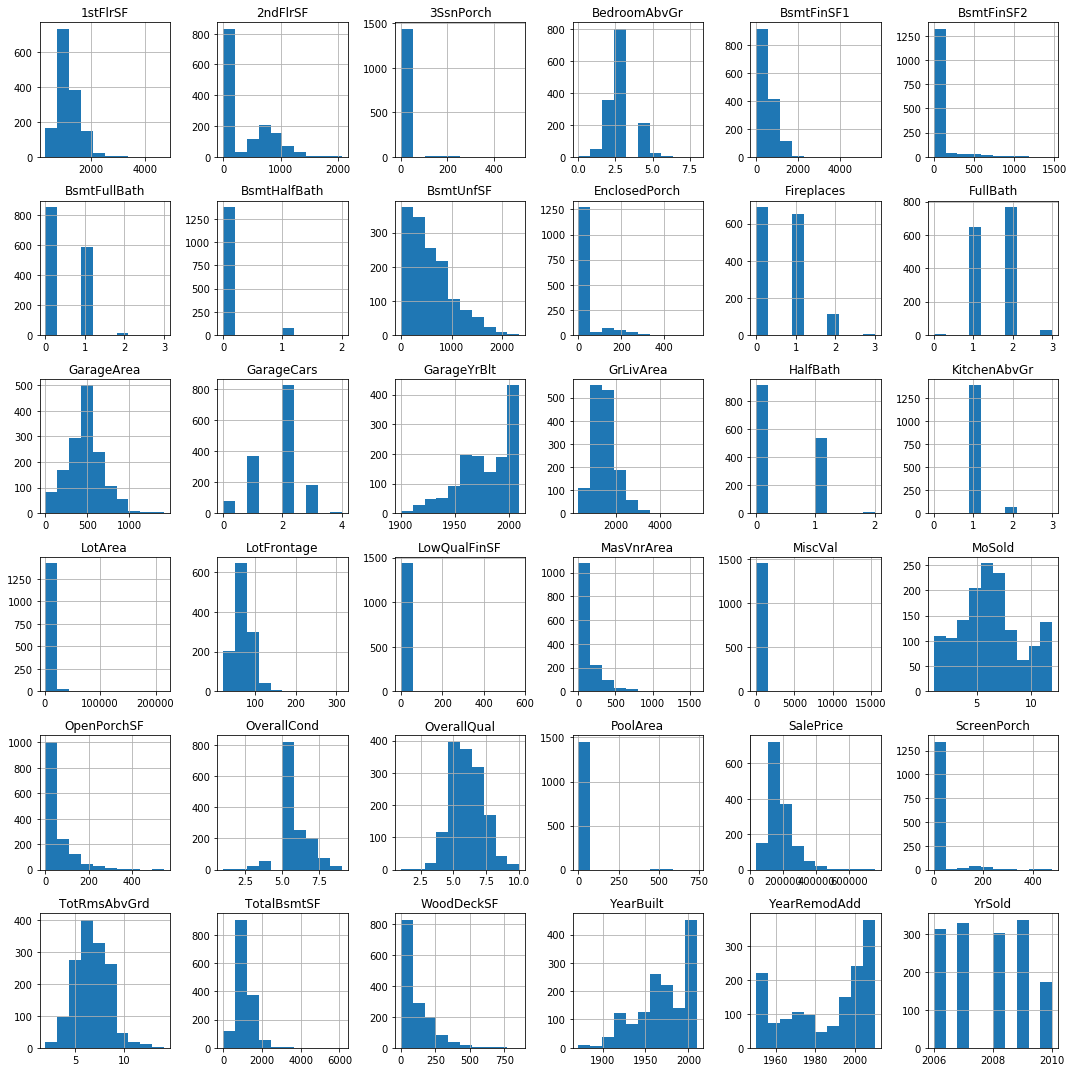

In [12]:
# EDA plot of the Numeric columns via hist subplots
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
housing_data[numeric_cols].hist(ax=ax)
fig.tight_layout()
fig.show()

#### What are your observations? Add them to this markdown cell.

---

There are 36 numeric features. There is also the `Id` column, which has no predictive power. 


### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

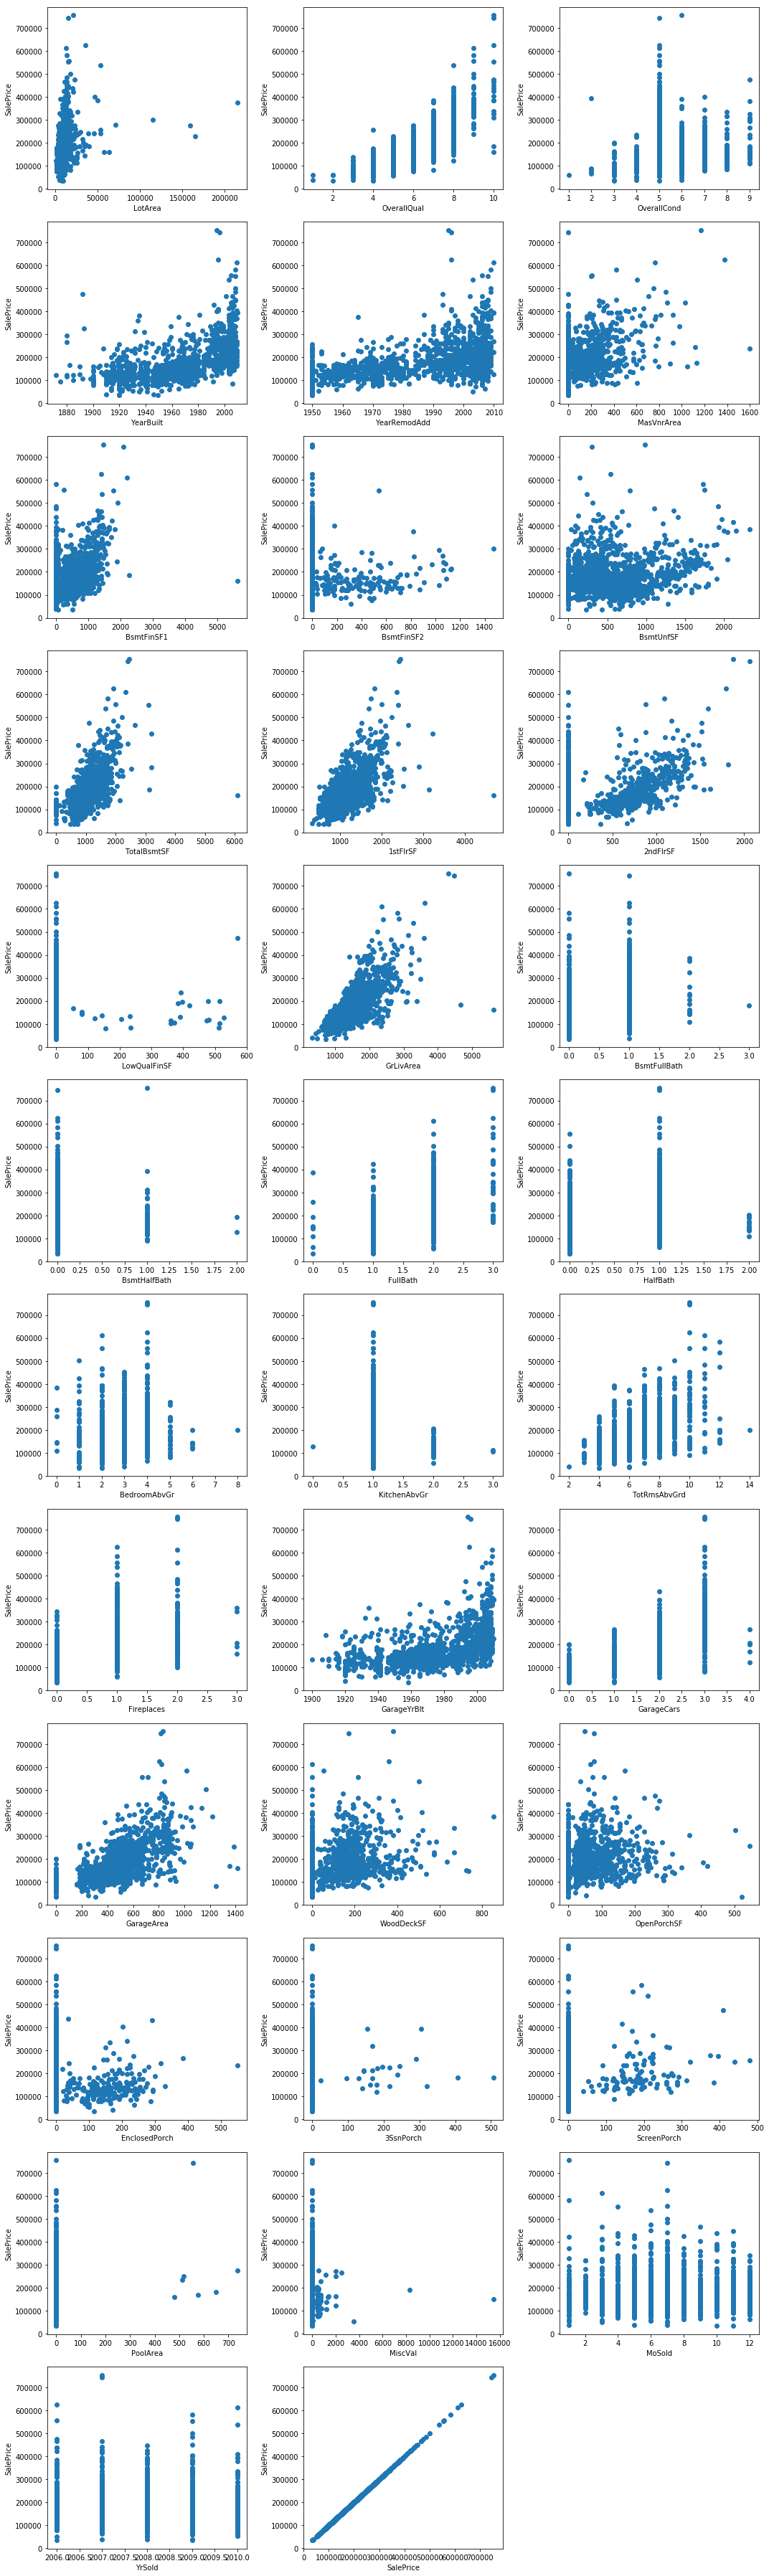

In [14]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_cols[1:]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(housing_data[col], housing_data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show()

#### What are your observations? Add them to this markdown cell.

---

For the numerical features, most features don't apper to have a relationship with price.

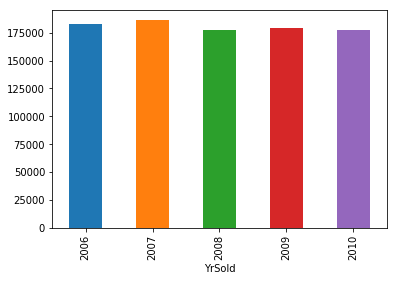

In [15]:
housing_data.groupby('YrSold').mean()['SalePrice'].plot.bar()

### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

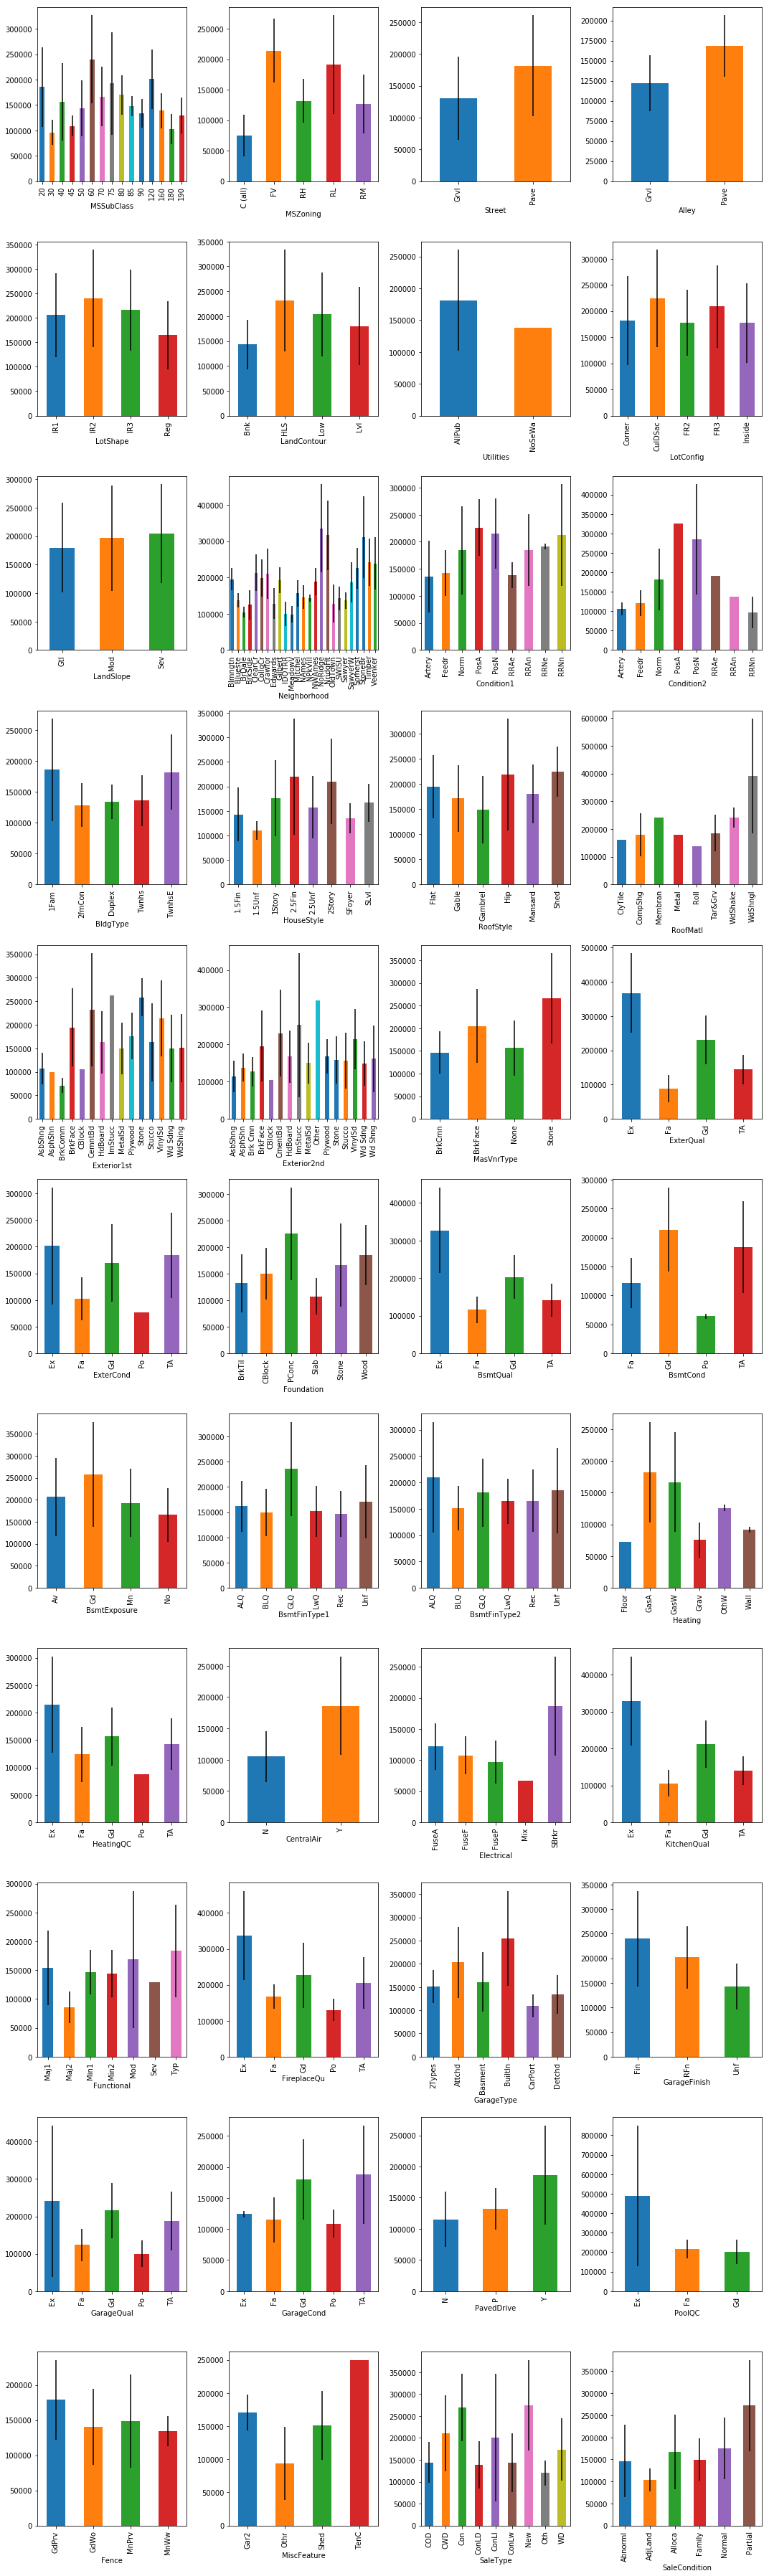

In [16]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(categorical_cols):
    fig.add_subplot(11,4,1+i)
    housing_data.groupby(col).mean()['SalePrice'].plot.bar(yerr = housing_data.groupby(col).std())
fig.tight_layout()
fig.show()

#### What are your observations? Add them to this markdown cell.

---

Most categorical features don't appear to have a strong relationship to the SalesPrice. 
The following that do appear to have a strong relationship to SalesPrice include 
- presence or absence of central air
- the neighborhood
- the external quality
- the zoning. 

## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [17]:
lower_quartile = housing_data.SalePrice.quantile(.25)
upper_quartile = housing_data.SalePrice.quantile(.75)
iqr = upper_quartile - lower_quartile
upper_bound = housing_data.SalePrice.mean() + 3 * iqr
lower_bound = housing_data.SalePrice.mean() - 3 * iqr

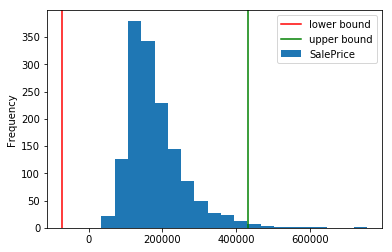

In [18]:
housing_data.SalePrice.plot.hist(bins=20)
plt.axvline(lower_bound, color = 'r', label = 'lower bound')
plt.axvline(upper_bound, color = 'g', label = 'upper bound')
plt.legend()
plt.show()

In [19]:
outlier_mask = (housing_data.SalePrice > lower_bound) & (housing_data.SalePrice < upper_bound)

housing_tukey_df = housing_data[outlier_mask]

In [20]:
housing_data.shape

(1460, 80)

In [21]:
housing_tukey_df.shape

(1442, 80)

In [22]:
print('{} homes were identified as outliers.'.format(housing_data.shape[0] - housing_tukey_df.shape[0]))

18 homes were identified as outliers.


### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1507575962&Signature=HUgKXCr3TOJMcb%2BGgbwFR4HGS7joOdSr0aO49X4453i2Y4LPFC2imccd%2BS2bzYMtUOqZSRW%2FNOGTwv5hI07%2FvXdFrgnnlyMz1l548aLi0Otg0jzIa11YXymXX4801QaoQmhMJV6ko0ycMJx5y00zSn8lOFNxVARz3aNNl6L8GKkodLITzAy72uPyCXS1iMuPFbmxdVbhYaO6OiKYh%2BDx%2Ftf2z9w3KSm5OGZacRcoxuYCnpZL6PpbG67hzaF21Vh9%2FV%2BrgEoEI0cL%2BKvwIUo5GcTGu0jmsixFx5JyHFZba6l5gDNRlT%2BIHEpjFAtHHrMEdTSzzlWSR2cEqig5WBsmXg%3D%3D) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

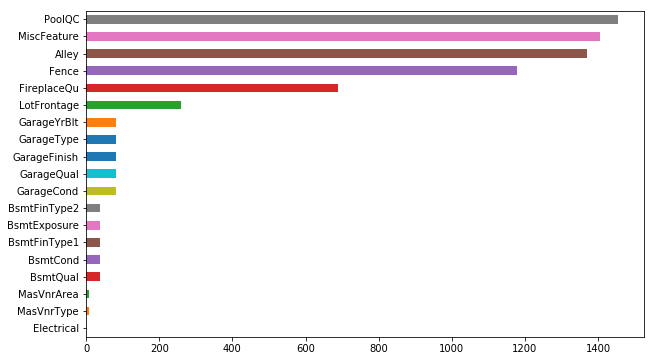

In [23]:
housing_data.isnull().sum()[housing_data.isnull().sum() > 0].sort_values().plot.barh(figsize=(10, 6))

In [24]:
na_cols = housing_data.isnull().sum()[housing_data.isnull().sum() > 0].index

In [25]:
na_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

|Feature | fill value|
|---|---|
|PoolQC | no pool |
|MiscFeature|no misc feature|
|Alley|no alley access|
|Fence|no fence|
|FireplaceQu|no fireplace|
|LotFrontage|fill with median, not normally distributed|
|GarageYrBlt|no garage... make categorical?|
|GarageType|no garage|
|GarageFinish|no garage|
|GarageQual|no garage|
|GarageCond|no garage|
|BsmtQual|no basement|
|BsmtCond|no basement|
|BsmtExposure|no basement|
|BsmtFinType1|no basement|
|BsmtFinType2|no basement|
|MasVnrArea|fill with 0... no masonry veneer|
|MasVnrType|No masonry veneer|
|Electrical|categorical... fill with unknown|



In [26]:
fill_with_no_feature_cols = [i for i in na_cols if i not in ['LotFrontage','GarageYrBlt','MasVnrArea']]

In [27]:
fill_with_no_feature_cols

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Fill values where null means something.

In [28]:
housing_data['Alley'] = housing_data['Alley'].fillna('no_alley')
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('no_vnr')
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('no_bsmt')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('no_bsmt')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('no_bsmt')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('no_bsmt')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('no_bsmt')
housing_data['Electrical'] = housing_data['Electrical'].fillna('unknown')
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('no_fireplace')
housing_data['GarageType'] = housing_data['GarageType'].fillna('no_garage')
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('no_garage')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('no_garage')
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('no_garage')
housing_data['PoolQC'] = housing_data['PoolQC'].fillna('no_pool')
housing_data['Fence'] = housing_data['Fence'].fillna('no_fence')
housing_data['MiscFeature'] = housing_data['MiscFeature'].fillna('no_misc_feat')

In [29]:
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median())
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].median())
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0)

Verify that you have *truly* eliminated all the null values!

In [30]:
housing_data.isnull().sum().sum()

0

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [31]:
housing_dummies = pd.get_dummies(housing_data)

### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = housing_dummies.drop('SalePrice', axis=1)
y = housing_dummies['SalePrice']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking


In [38]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Make a results `list` to hold your results. After each model fit and score, you will add a dictionary of your results to this list using `.append()`. This will give you a list of dictionaries ... perfect for a DataFrame!

This is the pattern you will be using:

In [43]:
example_results = list()
result_1 = {'name':'test1','dataset' : 'train','preprocessing': 'raw','score': '1 abunches'}
example_results.append(result_1)
result_2 = {'name':'test1','dataset' : 'train','preprocessing': 'scaled','score': '4 abunches'}
example_results.append(result_2)

In [44]:
pd.DataFrame(example_results)

,dataset,name,preprocessing,score
0,train,test1,raw,1 abunches
1,train,test1,scaled,4 abunches


This gives us a convenient tool for manipulating our results and tracking our work ... our old friend, Pandas!

#### Make a new results list.

In [45]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [46]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [47]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

Look at this fancy, `fit_append` function I made. This adheres to the [DRY](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle.

In [48]:
def fit_append(name, preprocessing, model, X_train, X_test, y_train, y_test, results_list):

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    results_list.append({'name': name,
                         'model': model,
                         'dataset' : 'train',
                         'preprocessing': preprocessing,
                         'score': train_score})
    results_list.append({'name': name,
                         'model': model,
                         'dataset' : 'test',
                         'preprocessing': preprocessing,
                         'score': test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [49]:
benchmark_scaled = LinearRegression()
fit_append('benchmark', 'scaled', benchmark_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

Use a DataFrame to display your results.

In [50]:
pd.DataFrame(results)

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.341906e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.792119e-01
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,9.341906e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.069323e+20


#### What are your observations? Add them to this markdown cell.

---

* The train score is better than the test score
* The raw test score is better than the scaled test score
* The raw and scaled train score are about the same

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

In [51]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [52]:
naive_ridge_raw = Ridge()
naive_ridge_scaled = Ridge()
naive_lasso_raw = Lasso()
naive_lasso_scaled = Lasso()
naive_elastic_raw = ElasticNet()
naive_elastic_scaled = ElasticNet()

In [53]:
fit_append('naive ridge', 'raw', naive_ridge_raw,
           X_train, X_test,
           y_train, y_test,
           results)

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

In [54]:
fit_append('naive lasso', 'raw', naive_lasso_raw,
           X_train, X_test,
           y_train, y_test,
           results)

In [55]:
fit_append('naive elasticnet', 'raw', naive_elastic_raw,
           X_train, X_test,
           y_train, y_test,
           results)

In [56]:
fit_append('naive ridge', 'scaled', naive_ridge_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

In [57]:
fit_append('naive lasso', 'scaled', naive_lasso_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

In [58]:
fit_append('naive elasticnet', 'scaled', naive_elastic_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           results)

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [59]:
results_df = pd.DataFrame(results)

#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [60]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,0.879212
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive ridge,raw,0.884676
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive lasso,raw,0.896226
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",naive elasticnet,raw,0.853298


#### What are your observations? Add them to this markdown cell.

---

* Regularized models do better than the benchmark

#### Display just the scaled test results

In [61]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.069323e+20
11,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive ridge,scaled,8.940682e-01
13,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive lasso,scaled,8.941623e-01
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",naive elasticnet,scaled,8.863925e-01


#### What are your observations? Add them to this markdown cell.

---



In [62]:
type(Ridge()) == Ridge

True

#### Display just the Benchmark models

In [63]:
results_df[(results_df.name.str.contains('benchmark')) & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,8.792119e-01
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-1.069323e+20


#### Display just the Ridge models

In [64]:
results_df[(results_df.name.str.contains('ridge')) & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
5,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive ridge,raw,0.884676
11,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive ridge,scaled,0.894068


#### Display just the Lasso models

In [65]:
results_df[(results_df.name.str.contains('lasso')) & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
7,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive lasso,raw,0.896226
13,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",naive lasso,scaled,0.894162


#### Display just the Elasticnet models

In [66]:
results_df[(results_df.name.str.contains('elastic')) & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
9,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",naive elasticnet,raw,0.853298
15,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",naive elasticnet,scaled,0.886392


#### What are your observations? Add them to this markdown cell.

---



### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [67]:
def fit_append_cv(name, preprocessing, model, X_train, X_test, y_train, y_test, results_list):

    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    results_list.append({'name': name,
                         'model': model,
                         'best_alpha': model.alpha_,
                         'dataset' : 'train',
                         'preprocessing': preprocessing,
                         'score': train_score})
    results_list.append({'name': name,
                         'model': model,
                         'best_alpha': model.alpha_,
                         'dataset' : 'test',
                         'preprocessing': preprocessing,
                         'score': test_score})

In [68]:
cv_results = list()

In [69]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [70]:
cross_validated_ridge = RidgeCV(alphas=np.logspace(-2,4,20))
cross_validated_lasso = LassoCV(alphas=np.logspace(-2,4,20))
cross_validated_elasticnet = ElasticNetCV(alphas=np.logspace(-2,4,20), l1_ratio=np.linspace(0,1,20))
cross_validated_ridge_scaled = RidgeCV(alphas=np.logspace(-2,4,20))
cross_validated_lasso_scaled = LassoCV(alphas=np.logspace(-2,4,20))
cross_validated_elasticnet_scaled = ElasticNetCV(alphas=np.logspace(-2,4,20), l1_ratio=np.linspace(0,1,20))

In [71]:
fit_append_cv('CV ridge', 'raw', 
           cross_validated_ridge,
           X_train, X_test,
           y_train, y_test,
           cv_results)

In [72]:
fit_append_cv('CV lasso', 'raw', 
           cross_validated_lasso,
           X_train, X_test,
           y_train, y_test,
           cv_results)

In [73]:
fit_append_cv('CV elasticnet', 'raw', 
           cross_validated_elasticnet,
           X_train, X_test,
           y_train, y_test,
           cv_results)

In [74]:
fit_append_cv('CV ridge', 'scaled', 
           cross_validated_ridge_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           cv_results)

In [75]:
fit_append_cv('CV lasso', 'scaled', 
           cross_validated_lasso_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           cv_results)

In [76]:
fit_append_cv('CV elasticnet', 'scaled', 
           cross_validated_elasticnet_scaled,
           X_train_scaled, X_test_scaled,
           y_train, y_test,
           cv_results)

In [77]:
cv_results_df = pd.DataFrame(cv_results)

#### Display just the raw test results

In [78]:
cv_results_df[(cv_results_df.preprocessing == 'raw') & 
           (cv_results_df.dataset == 'test')]

,best_alpha,dataset,model,name,preprocessing,score
1,6.951928,test,"RidgeCV(alphas=array([ 1.00000e-02, 2.06914...",CV ridge,raw,0.884856
3,127.427499,test,"LassoCV(alphas=array([ 1.00000e-02, 2.06914...",CV lasso,raw,0.904116
5,127.427499,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 2....",CV elasticnet,raw,0.904116


#### Display just the scaled test results

In [79]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')].sort_values('score', ascending = False)

,best_alpha,dataset,model,name,preprocessing,score
9,1128.837892,test,"LassoCV(alphas=array([ 1.00000e-02, 2.06914...",CV lasso,scaled,0.902672
11,1128.837892,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 2....",CV elasticnet,scaled,0.902672
7,545.559478,test,"RidgeCV(alphas=array([ 1.00000e-02, 2.06914...",CV ridge,scaled,0.886447




For each model...

* Instantiate and fit the model. If a cross-validated model exists (ex: `RidgeCV`), use it to tune your hyperparameters!
* Score the model with the built-in method (R2) on the train and test set
* generate predictions for that model
* if it's a regularized model, tune $\alpha$. Also try different `l1_ratio`s with your `ElasticNet`.
* visualize the coefficients of each model (`model.coef_`) using a bar plot. Make sure to include column names so you can see which feature the coefficient is for! (**HINT:** once you figure out how to do it, make a function!)

### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [80]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')].sort_values('score', ascending = False)

,best_alpha,dataset,model,name,preprocessing,score
9,1128.837892,test,"LassoCV(alphas=array([ 1.00000e-02, 2.06914...",CV lasso,scaled,0.902672
11,1128.837892,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 2....",CV elasticnet,scaled,0.902672
7,545.559478,test,"RidgeCV(alphas=array([ 1.00000e-02, 2.06914...",CV ridge,scaled,0.886447


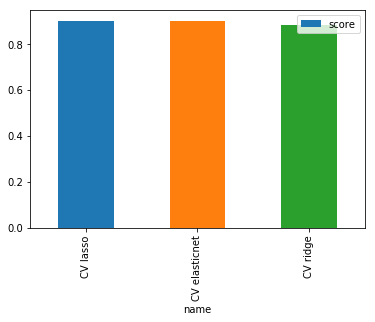

In [81]:
cv_results_df[(cv_results_df.preprocessing == 'scaled') & 
           (cv_results_df.dataset == 'test')].sort_values('score', ascending = False)[['name','score']].plot.bar(x='name',y='score')

Regularized linear models performed relatively well on this dataset. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.
* Interpret coefficients in terms of \$ value


In [82]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

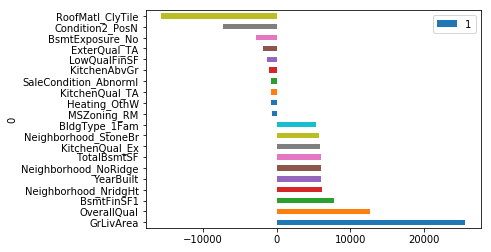

In [85]:


plot_coef(cross_validated_lasso_scaled)

#### Which features add / take away most value from a home?

**Removes Value (in rank merit order):**
1. Clay tile roofing
1. Proximity to park
1. Basement exposure

**Adds Value (in rank merit order):**
1. Great Living Room design
1. Overall Quality
1. Finished Basement